# Machine Learning: 3 Tiers on County House Prices with Categories and Stars

In [8]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
#Read in the CSV and read in the data
df = pd.read_csv("../Neighborhood/neighborhood_stars_categories.csv")

In [3]:
df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

In [4]:
df.shape

(13988, 451)

In [ ]:
df.City.value_counts()

In [ ]:
df_ml = df.groupby('City').filter(lambda x : len(x)>=10)
df_ml.shape

In [ ]:
df_ml.columns.to_list()

# Feature Engineering

In [5]:
#Drop counties that have less than 10 zipcodes
df = df.groupby('CountyName').filter(lambda x : len(x)>10)
df.shape

(9952, 451)

In [14]:
df.columns.to_list()

['postal_code',
 'City',
 'State',
 'CountyName',
 '2021',
 'total_restaurants',
 'total_reviews',
 'avg_rating',
 'total_delivery',
 'total_pickup',
 'total_rest_reservation',
 'total_price_1',
 'total_price_2',
 'total_price_3',
 'total_price_4',
 'total_0.0_stars',
 'total_1.0_stars',
 'total_1.5_stars',
 'total_2.0_stars',
 'total_2.5_stars',
 'total_3.0_stars',
 'total_3.5_stars',
 'total_4.0_stars',
 'total_4.5_stars',
 'total_5.0_stars',
 'num_rest_types',
 'bars_stars',
 'newamerican_stars',
 'wine_bars_stars',
 'italian_stars',
 'tapasmallplates_stars',
 'pizza_stars',
 'breakfast_brunch_stars',
 'mexican_stars',
 'mediterranean_stars',
 'sandwiches_stars',
 'pubs_stars',
 'breweries_stars',
 'cajun_stars',
 'seafood_stars',
 'desserts_stars',
 'cafes_stars',
 'venezuelan_stars',
 'coffee_stars',
 'comfortfood_stars',
 'tradamerican_stars',
 'cocktailbars_stars',
 'bagels_stars',
 'salad_stars',
 'burgers_stars',
 'korean_stars',
 'chicken_wings_stars',
 'french_stars',
 'fish

In [11]:
df_check = df.drop(columns=['postal_code',
 'City',
 'State',
 'CountyName',
 '2021',
 'total_restaurants',
 'total_reviews',
 'avg_rating','num_rest_types','Average County House Price',
 'Neighborhood Indicator',
 'Neighborhood Tiers'])
d = df_check.sum()

In [12]:
d

total_delivery              134886.000000
total_pickup                 74901.000000
total_rest_reservation        2233.000000
total_price_1                54605.000000
total_price_2                80735.000000
total_price_3                 5557.000000
total_price_4                 1061.000000
total_0.0_stars                 46.000000
total_1.0_stars               2893.000000
total_1.5_stars               3485.000000
total_2.0_stars               6519.000000
total_2.5_stars               9736.000000
total_3.0_stars              16862.000000
total_3.5_stars              34812.000000
total_4.0_stars              61097.000000
total_4.5_stars              43936.000000
total_5.0_stars              15384.000000
bars_stars                   17008.952161
newamerican_stars            18090.521183
wine_bars_stars               7380.499233
italian_stars                17172.278428
tapasmallplates_stars         3844.784127
pizza_stars                  24004.711058
breakfast_brunch_stars       23083

### Create Scaled Training and Test data

In [29]:
# Create the features
X = df.drop(['postal_code',
 'City',
 'State',
 'CountyName',
 '2021','Average County House Price',
 'Neighborhood Indicator',
 'Neighborhood Tiers'], axis=1)
print(X.shape)
X.head()

(9952, 443)


,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,noodles,sushi,himalayan,indpak,chickens

In [30]:
X.describe()

,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,noodles,sushi,himalayan,indpak,chickens

In [31]:
#Create target variable
y = df['Neighborhood Tiers']
y.shape

(9952,)

In [32]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({2: 3254, 3: 2196, 1: 2014})
y_test: Counter({2: 1083, 3: 728, 1: 677})


In [33]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
X_train_scaled[:, 2]

array([ 2.09006461,  0.6394234 , -0.83319723, ..., -0.67934134,
        0.19307226,  0.24379398])

In [35]:
X_test_scaled[:,2]

array([-0.67934134, -0.14578607, -0.7997503 , ...,  1.1669293 ,
        0.03865279,  0.82682681])

# Create a logistic regression model

In [36]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [37]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

/Users/ramyaramamurthy/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=200, random_state=1)

In [38]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
7261,2,1
2060,1,1
10070,2,3
4809,2,3
13307,3,2
3030,2,1
12783,2,2
293,2,3
1060,2,2
7356,2,1


In [39]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = balanced_accuracy_score(y_test, y_pred_LR)
acc_LR

0.41874367256685785

In [40]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.6808681672025724

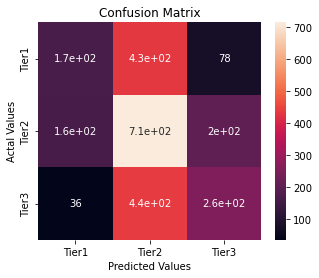

In [41]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [42]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.45      0.25      0.32       677
           2       0.45      0.66      0.54      1083
           3       0.47      0.35      0.40       728

    accuracy                           0.46      2488
   macro avg       0.46      0.42      0.42      2488
weighted avg       0.46      0.46      0.44      2488



# Create Balanced Random Forest Classifier

In [53]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=50, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=50, random_state=1)

In [54]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)


0.4693843943277242

In [55]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.8963022508038585

In [56]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
7261,3,1
2060,1,1
10070,1,3
4809,2,3
13307,2,2
3030,1,1
12783,1,2
293,3,3
1060,3,2
7356,3,1


In [57]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([1.74468132e-02, 5.60726401e-02, 2.66433185e-02, 1.73757298e-02,
       1.20304679e-02, 1.95269255e-03, 2.09016397e-02, 1.80363006e-02,
       6.55738163e-03, 1.21447488e-03, 4.74680116e-04, 4.66291009e-03,
       3.77978542e-03, 4.93151603e-03, 5.75926738e-03, 8.83567340e-03,
       1.09658725e-02, 1.38533795e-02, 1.36075155e-02, 1.22474803e-02,
       2.41339790e-02, 1.16253972e-02, 1.19850216e-02, 5.63434174e-03,
       9.70544073e-03, 1.90067157e-03, 1.64213296e-02, 1.22709790e-02,
       1.23461296e-02, 3.59777524e-03, 1.35726126e-02, 4.77706235e-03,
       1.85250525e-03, 2.95070581e-03, 1.03576669e-02, 4.91382660e-03,
       8.27628124e-03, 4.48009863e-04, 7.90461578e-03, 3.97152643e-03,
       1.75114216e-02, 5.79406310e-03, 9.00445135e-04, 7.22408046e-03,
       1.41510755e-02, 2.54350005e-03, 8.96077174e-03, 1.94975575e-03,
       2.36107520e-03, 3.46896801e-03, 1.49124541e-03, 9.94692165e-03,
       9.69861238e-04, 3.64685867e-03, 8.16233923e-04, 1.25947605e-03,
      

In [58]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.056072640122555424, 'total_reviews'),
 (0.026643318485753457, 'avg_rating'),
 (0.024133979047769025, 'num_rest_types'),
 (0.02090163972523568, 'total_price_1'),
 (0.018036300588816934, 'total_price_2'),
 (0.017511421556575358, 'tradamerican_stars'),
 (0.017446813182130573, 'total_restaurants'),
 (0.0173757297726138, 'total_delivery'),
 (0.01642132959179792, 'pizza_stars'),
 (0.014151075535311176, 'burgers_stars'),
 (0.013853379479356354, 'total_4.0_stars'),
 (0.013607515522452074, 'total_4.5_stars'),
 (0.01357261263154002, 'sandwiches_stars'),
 (0.012815240810933007, 'tradamerican'),
 (0.012346129595080399, 'mexican_stars'),
 (0.012270979014523776, 'breakfast_brunch_stars'),
 (0.012247480316248099, 'total_5.0_stars'),
 (0.01203046789702253, 'total_pickup'),
 (0.011985021641587683, 'newamerican_stars'),
 (0.011764704898890564, 'pizza'),
 (0.011625397199580272, 'bars_stars'),
 (0.010965872452375536, 'total_3.5_stars'),
 (0.010495636988898055, 'mexican'),
 (0.010357666946869475, 'seaf

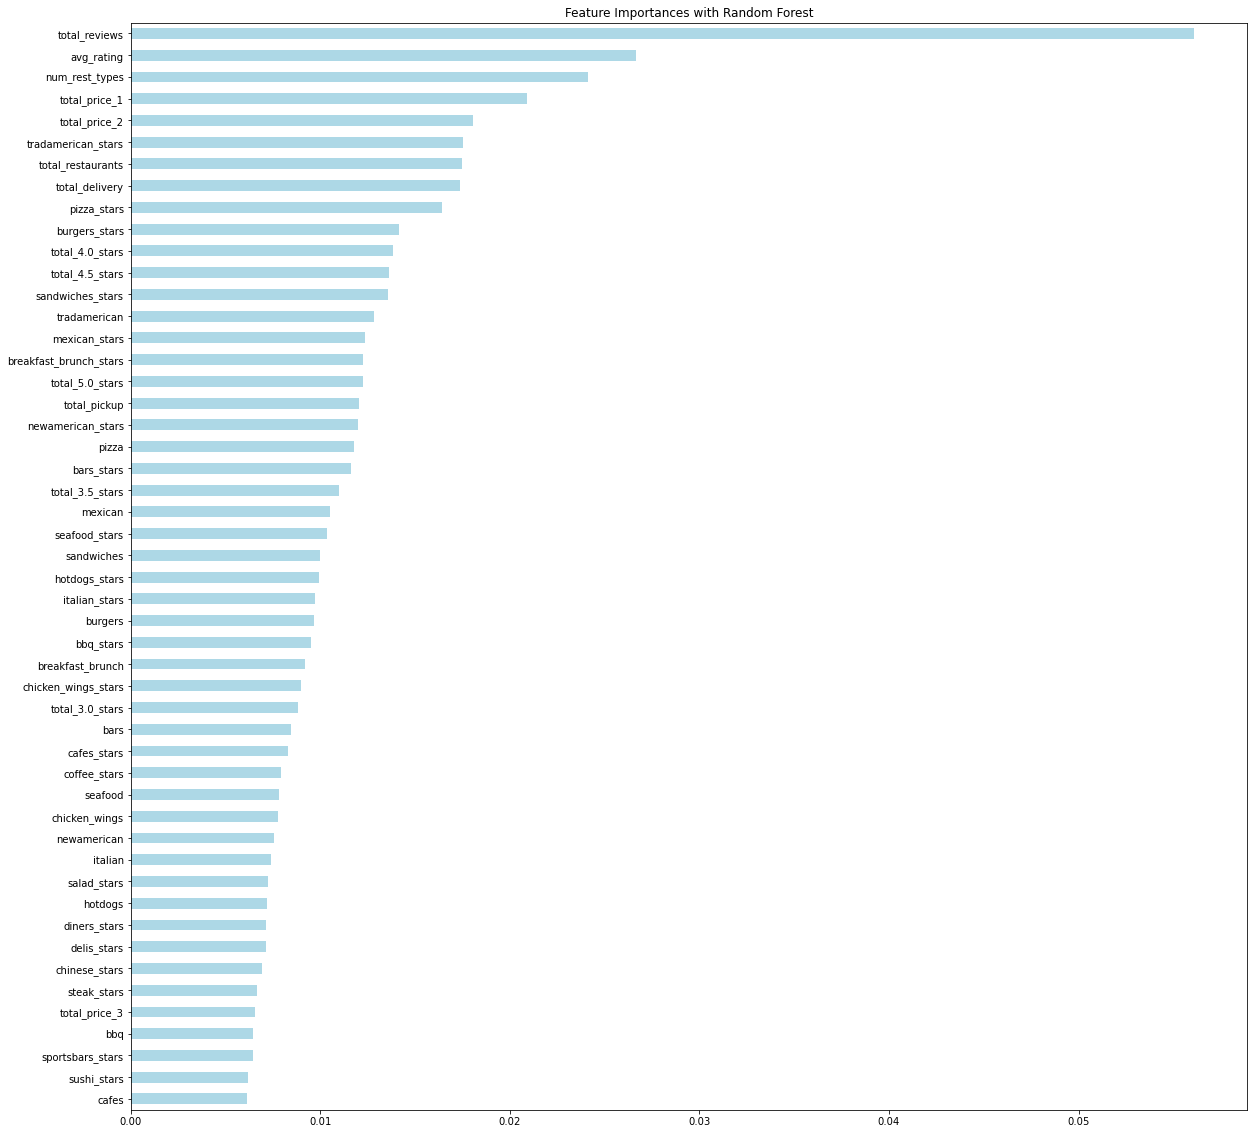

In [68]:
# Plot influential features based on Random Forest model:
influential_features = pd.Series(model_RF.feature_importances_, X.columns)
influential_features.nlargest(50).sort_values().plot(kind='barh', color='lightblue', figsize=(20,20))
plt.title('Feature Importances with Random Forest');


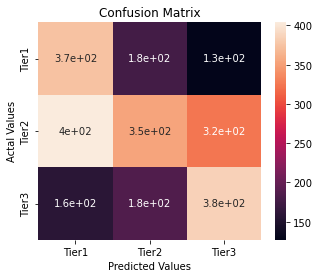

In [50]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.40      0.55      0.46       677
           2       0.50      0.33      0.39      1083
           3       0.46      0.53      0.49       728

    accuracy                           0.45      2488
   macro avg       0.45      0.47      0.45      2488
weighted avg       0.46      0.45      0.44      2488



# Create Easy Ensemble AdaBoost Classifier

In [70]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=75, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=75, random_state=1)

In [71]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)
accuracy_score(y_test, y_pred_Ada)

0.4477491961414791

In [72]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
7261,3,1
2060,1,1
10070,2,3
4809,3,3
13307,2,2
3030,2,1
12783,2,2
293,3,3
1060,3,2
7356,3,1


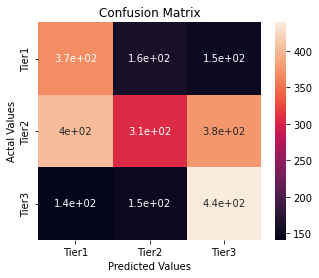

In [73]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [74]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.40      0.55      0.46       677
           2       0.50      0.28      0.36      1083
           3       0.46      0.60      0.52       728

    accuracy                           0.45      2488
   macro avg       0.45      0.48      0.45      2488
weighted avg       0.46      0.45      0.44      2488



# Create Gradient Boosting Classifier

In [75]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.436
Accuracy score (validation): 0.436

Learning rate:  0.1
Accuracy score (training): 0.447
Accuracy score (validation): 0.439

Learning rate:  0.25
Accuracy score (training): 0.497
Accuracy score (validation): 0.475

Learning rate:  0.5
Accuracy score (training): 0.520
Accuracy score (validation): 0.472

Learning rate:  0.75
Accuracy score (training): 0.533
Accuracy score (validation): 0.467

Learning rate:  1
Accuracy score (training): 0.536
Accuracy score (validation): 0.460



In [76]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
7261,2,1
2060,2,1
10070,2,3
4809,2,3
13307,3,2
3030,2,1
12783,1,2
293,2,3
1060,3,2
7356,3,1


In [77]:
balanced_accuracy_score(y_test, y_pred_GBC)

0.4299263187910553

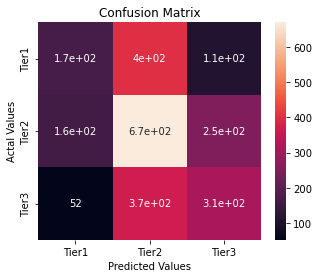

In [78]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [79]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.44      0.25      0.32       677
           2       0.47      0.62      0.53      1083
           3       0.46      0.42      0.44       728

    accuracy                           0.46      2488
   macro avg       0.46      0.43      0.43      2488
weighted avg       0.46      0.46      0.45      2488



# Naive Bayes model

In [80]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [81]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [82]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
7261,3,1
2060,1,1
10070,3,3
4809,3,3
13307,2,2
3030,3,1
12783,1,2
293,3,3
1060,3,2
7356,3,1


In [83]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.34364951768488744


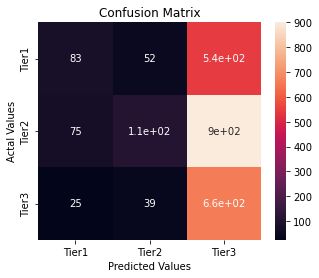

In [84]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [85]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.45      0.12      0.19       677
           2       0.54      0.10      0.17      1083
           3       0.32      0.91      0.47       728

    accuracy                           0.34      2488
   macro avg       0.44      0.38      0.28      2488
weighted avg       0.45      0.34      0.26      2488



In [87]:
# print the accuracy score of each model:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, y_pred_bayes)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_RF)*100,'%')
print('Adaboost Test Accuracy: ', accuracy_score(y_test, y_pred_Ada)*100,'%')
print('Gradient Boost Test Accuracy: ', accuracy_score(y_test, y_pred_GBC)*100,'%')
print('Logistic Regession Test Accuracy: ', accuracy_score(y_test, y_pred_LR)*100,'%')

# Print the F1 score of each model:
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
print('Naive Bayes F1 Score: ', f1_score(y_test, y_pred_bayes, average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, y_pred_RF, average='weighted'))
print('Adaboost F1 Score: ', f1_score(y_test, y_pred_Ada, average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, y_pred_GBC, average='weighted'))
print('Logistic Regession F1 Score: ', f1_score(y_test, y_pred_LR, average='weighted'))


----------------------------------------
Accuracy
----------------------------------------
Naive Bayes Test Accuracy:  34.364951768488744 %
Random Forest Test Accuracy:  44.734726688102896 %
Adaboost Test Accuracy:  44.77491961414791 %
Gradient Boost Test Accuracy:  46.061093247588424 %
Logistic Regession Test Accuracy:  45.659163987138264 %

----------------------------------------
Weighted F1 Score
----------------------------------------
Naive Bayes F1 Score:  0.2629764862180464
Random Forest F1 Score:  0.4415537879062361
Adaboost F1 Score:  0.435374825784702
Gradient Boost F1 Score:  0.44672573283997324
Logistic Regession F1 Score:  0.4380925885889567
